<a href="https://colab.research.google.com/github/ameram/dcnn-classification/blob/master/raisin_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [114]:
import os
import matplotlib.pyplot as plt
import keras
from keras import layers, Sequential

os.listdir('drive/MyDrive/data')
os.chdir('drive/MyDrive/data')


test = image_dataset_from_directory('.', class_names=['fruits', 'humans'], seed = 42, subset = 'training', validation_split=0.2, image_size=(100, 100))
val = image_dataset_from_directory('.', class_names=['fruits', 'humans'], seed = 42, subset = 'validation', validation_split=0.2, image_size=(100, 100))


# train_dataset = image_dataset_from_directory(
#     "size-100/train",
#     image_size=(100, 100),
#     batch_size=32)
# val_dataset = image_dataset_from_directory(
#     "size-100/val",
#     image_size=(100, 100),
#     batch_size=32)

FileNotFoundError: ignored

In [213]:
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
Categories=['humans','fruits']

flat_data_arr=[] #input array
target_arr=[] #output array

datadir='' 
#path which contains all the categories of images

for i in Categories:
    
    print(f'Loading... category : {i}')
    path=os.path.join(datadir,i)

    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        # img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(np.asarray(img_array))
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
print(f"{len(flat_data_arr)} added successfully")


# type(flat_data_arr)
big_x = np.array(flat_data_arr)
big_y = np.array(target_arr)
x_train, x_test, y_train, y_test = train_test_split(big_x, big_y, test_size=0.2,random_state=42,stratify=big_y)

# x_train = x_train.astype('float')
# x_test = x_test.astype('float')
x_train = x_train / 255.0
x_test = x_test / 255.0

Loading... category : humans
loaded category:humans successfully
Loading... category : fruits
loaded category:fruits successfully
100 added successfully


In [215]:
x_test.shape

(20, 100, 100, 3)

In [222]:
# inputs = keras.Input(shape=(100, 100, 3))
# x = layers.Rescaling(1)(inputs)
# x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
# x = layers.Flatten()(x)
# outputs = layers.Dense(1, activation="tanh")(x)
# model = keras.Model(inputs=inputs, outputs=x)


model = Sequential([
    layers.Conv2D(filters=8,kernel_size=(3,3),  input_shape = (100, 100, 3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=16,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    # layers.Dropout(0.25),

    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    # layers.Dropout(0.25),
    layers.Dense(1, activation='softmax')
])

In [243]:
nn_model = keras.models.Sequential()
nn_model.add(keras.layers.Flatten(input_shape=[100, 100, 3]))
nn_model.add(keras.layers.Dense(2200, activation="relu"))
nn_model.add(keras.layers.Dense(1000, activation="relu"))
nn_model.add(keras.layers.Dense(90, activation="relu"))
nn_model.add(keras.layers.Dense(1, activation="sigmoid"))

In [223]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 98, 98, 8)         224       
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 49, 49, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 47, 47, 16)        1168      
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 10, 10, 32)     

In [244]:
nn_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 30000)             0         
                                                                 
 dense_56 (Dense)            (None, 2200)              66002200  
                                                                 
 dense_57 (Dense)            (None, 1000)              2201000   
                                                                 
 dense_58 (Dense)            (None, 90)                90090     
                                                                 
 dense_59 (Dense)            (None, 1)                 91        
                                                                 
Total params: 68,293,381
Trainable params: 68,293,381
Non-trainable params: 0
_________________________________________________________________


In [234]:
import tensorflow as tf
from keras.optimizers import SGD

# model.compile(loss="binary_crossentropy",
#               optimizer="rmsprop",
#               metrics=["accuracy"])

# LOSSES: categorical_crossentropy
# OPTIMIZERS: tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

In [245]:
nn_model.compile(loss="binary_crossentropy",
                 optimizer="sgd", metrics=["accuracy"])

In [219]:
# This is with numpy 
history2 = model.fit(x_train, y_train, epochs=4, validation_data=(x_test, y_test))

Epoch 1/4
3/3 [==============================] - 1s 165ms/step - loss: 0.6951 - accuracy: 0.5000 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 2/4
3/3 [==============================] - 0s 102ms/step - loss: 0.6991 - accuracy: 0.5000 - val_loss: 0.6870 - val_accuracy: 0.5000
Epoch 3/4
3/3 [==============================] - 0s 98ms/step - loss: 0.6819 - accuracy: 0.5000 - val_loss: 0.6812 - val_accuracy: 0.5000
Epoch 4/4
3/3 [==============================] - 0s 106ms/step - loss: 0.6839 - accuracy: 0.5000 - val_loss: 0.6739 - val_accuracy: 0.5000


In [238]:
# This one is with default TF Datasets

history = model.fit(
    test,
    epochs=5,
    validation_data=val)

Epoch 1/5
3/3 [==============================] - 1s 143ms/step - loss: 2225.7009 - accuracy: 0.4750 - val_loss: 0.9671 - val_accuracy: 0.6000
Epoch 2/5
3/3 [==============================] - 0s 100ms/step - loss: 0.9298 - accuracy: 0.4750 - val_loss: 0.7113 - val_accuracy: 0.6000
Epoch 3/5
3/3 [==============================] - 0s 107ms/step - loss: 0.6918 - accuracy: 0.4750 - val_loss: 0.7046 - val_accuracy: 0.6000
Epoch 4/5
3/3 [==============================] - 0s 109ms/step - loss: 0.6851 - accuracy: 0.4750 - val_loss: 0.7026 - val_accuracy: 0.6000
Epoch 5/5
3/3 [==============================] - 0s 104ms/step - loss: 0.7032 - accuracy: 0.4750 - val_loss: 0.7069 - val_accuracy: 0.6000


In [236]:
nn_history = nn_model.fit(test, epochs=5, validation_data=val)

Epoch 1/5
3/3 [==============================] - 1s 115ms/step - loss: 6269047808.0000 - accuracy: 0.4250 - val_loss: 59055355723776.0000 - val_accuracy: 0.4000
Epoch 2/5
3/3 [==============================] - 0s 79ms/step - loss: 17247579930624.0000 - accuracy: 0.5375 - val_loss: 6587628637218480952310759424.0000 - val_accuracy: 0.6000
Epoch 3/5
3/3 [==============================] - 0s 85ms/step - loss: 111953878898562006745744408576.0000 - accuracy: 0.5250 - val_loss: 493517057246215589068800.0000 - val_accuracy: 0.4000
Epoch 4/5
3/3 [==============================] - 0s 78ms/step - loss: 1284784641109889235673358207163564032.0000 - accuracy: 0.5250 - val_loss: nan - val_accuracy: 0.6000
Epoch 5/5
3/3 [==============================] - 0s 83ms/step - loss: nan - accuracy: 0.5250 - val_loss: nan - val_accuracy: 0.4000


In [246]:
nn_np_history = nn_model.fit(x_train, y_train, epochs=4, validation_data=(x_test, y_test))

Epoch 1/4
3/3 [==============================] - 1s 327ms/step - loss: 1.1400 - accuracy: 0.4750 - val_loss: 1.1491 - val_accuracy: 0.5000
Epoch 2/4
3/3 [==============================] - 0s 151ms/step - loss: 0.7302 - accuracy: 0.7125 - val_loss: 0.5916 - val_accuracy: 0.5000
Epoch 3/4
3/3 [==============================] - 0s 151ms/step - loss: 0.4850 - accuracy: 0.6375 - val_loss: 0.3299 - val_accuracy: 0.8500
Epoch 4/4
3/3 [==============================] - 0s 149ms/step - loss: 0.3892 - accuracy: 0.8875 - val_loss: 0.1838 - val_accuracy: 1.0000


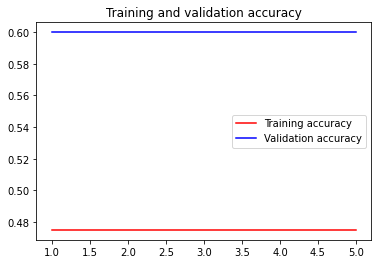

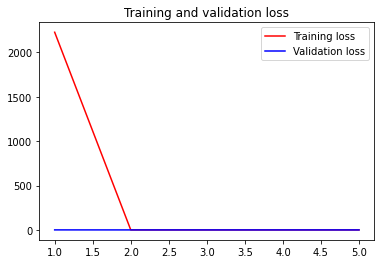

In [239]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

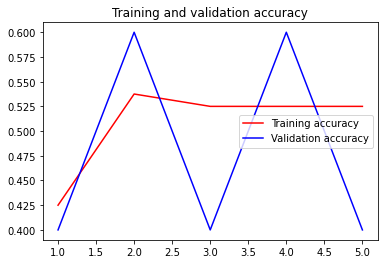

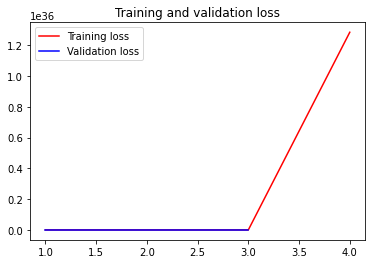

In [237]:
accuracy = nn_history.history["accuracy"]
val_accuracy = nn_history.history["val_accuracy"]
loss = nn_history.history["loss"]
val_loss = nn_history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

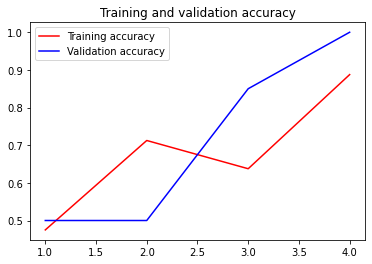

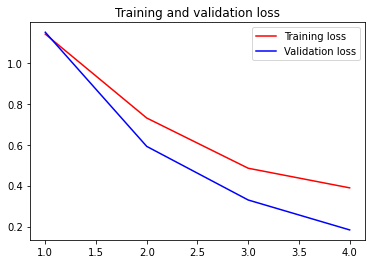

In [247]:
accuracy = nn_np_history.history["accuracy"]
val_accuracy = nn_np_history.history["val_accuracy"]
loss = nn_np_history.history["loss"]
val_loss = nn_np_history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# USING SVM

In [309]:
fx_model = Sequential([
    layers.Conv2D(filters=8,kernel_size=(3,3),  input_shape = (100, 100, 3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=16,kernel_size=(3,3), activation='relu'),
    # layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization()
])

In [310]:
fx_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 98, 98, 8)         224       
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 49, 49, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 47, 47, 16)        1168      
                                                                 
 conv2d_79 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization (BatchN  (None, 22, 22, 32)     

In [311]:
fx_model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])


In [312]:
fx_features = []
fx_features.append(fx_model.predict(x_train))
fx_features.append(fx_model.predict(x_test))
fx_features = np.concatenate(fx_features)
fx_features.shape

1/1 [==============================] - 0s 39ms/step


(100, 22, 22, 32)

In [313]:
fx_labels = []
fx_labels.append(y_train)
fx_labels.append(y_test)
fx_labels = np.concatenate(fx_labels)
fx_labels.shape

(100,)

In [314]:
svm_x_train, svm_x_test, svm_y_train, svm_y_test = train_test_split(fx_features, fx_labels, test_size=0.2,random_state=42,stratify=fx_labels)

In [315]:
flat_svm_x_train = svm_x_train.reshape(80, -1)
flat_svm_x_test = svm_x_test.reshape(20, -1)

In [316]:
from sklearn.svm import LinearSVC

lsvm_2 = LinearSVC(C=1, loss='hinge')
lsvm_2.fit(flat_svm_x_train, svm_y_train)

LinearSVC(C=1, loss='hinge')

In [318]:
y_pred = lsvm_2.predict(flat_svm_x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(svm_y_test))
print(f'The model is {accuracy_score(y_pred, svm_y_test) * 100} accurate.')

The predicted Data is :
[1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1]
The actual data is:
[1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1]
The model is 90.0 accurate.


In [255]:
conv_base = keras.applications.vgg16.VGG16(weights='imagenet',
                                           include_top=False,
                                           input_shape=(100, 100, 3))
conv_base.summary()

58889256/58889256 [==============================] - 1s 0us/step


In [322]:
def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocesses_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocesses_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

In [324]:
data_for_vgg = image_dataset_from_directory('.', class_names=['fruits', 'humans'], seed = 42, image_size=(100, 100))

Found 100 files belonging to 2 classes.


In [337]:
vgg_features, vgg_label = get_features_and_labels(data_for_vgg)

1/1 [==============================] - 0s 288ms/step


(100, 3, 3, 512)

In [338]:
vgg_features = vgg_features.reshape(100, -1)
vgg_features.shape

(100, 4608)

In [344]:
vgg_x_train, vgg_x_test, vgg_y_train, vgg_y_test  = train_test_split(vgg_features, vgg_label, test_size=0.2,random_state=42,stratify=vgg_label)

In [346]:
vgg_svc = LinearSVC(C=1, loss='hinge')
vgg_svc.fit(vgg_x_train, vgg_y_train)

y_pred = vgg_svc.predict(vgg_x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(vgg_y_test))
print(f'The model is {accuracy_score(y_pred, vgg_y_test) * 100} accurate.')

The predicted Data is :
[1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1]
The actual data is:
[1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1]
The model is 100.0 accurate.
